# RVC 1, Ch2.2
https://petercorke.github.io/spatialmath-python/func_3d.html

In [ ]:
# Works best with jupyter-notebook

In [4]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

## Lec 3.6 Describing 3D Rotations

In [5]:
# Rotations about a given axis can be achieved with:
# SO(3) rotx, roty, rotz which create SO(3) (ndarray (3,3)) rotation matrices
# SE(3) trotx, troty, trotz which create SE(3) (ndarray (4,4)) rotation matrices
rx=rotx(0.2)
print(rx)

[[       1        0        0]
 [       0   0.9801  -0.1987]
 [       0   0.1987   0.9801]]


In [6]:
rx=rotx(30,'deg')
print(rx)

[[       1        0        0]
 [       0    0.866     -0.5]
 [       0      0.5    0.866]]


In [7]:
np.linalg.det(rx)

1.0

In [8]:
np.linalg.inv(rx)

array([[       1,        0,        0],
       [       0,    0.866,      0.5],
       [       0,     -0.5,    0.866]])

In [9]:
rx.transpose()

array([[       1,        0,        0],
       [       0,    0.866,      0.5],
       [       0,     -0.5,    0.866]])

In [10]:
# Repeat about the y-axis
ry=roty(0.2)
print(ry)

[[  0.9801        0   0.1987]
 [       0        1        0]
 [ -0.1987        0   0.9801]]


In [11]:
# And about z
rz=rotz(0.3)
print(rz)


[[  0.9553  -0.2955        0]
 [  0.2955   0.9553        0]
 [       0        0        1]]


<IPython.core.display.Javascript object>


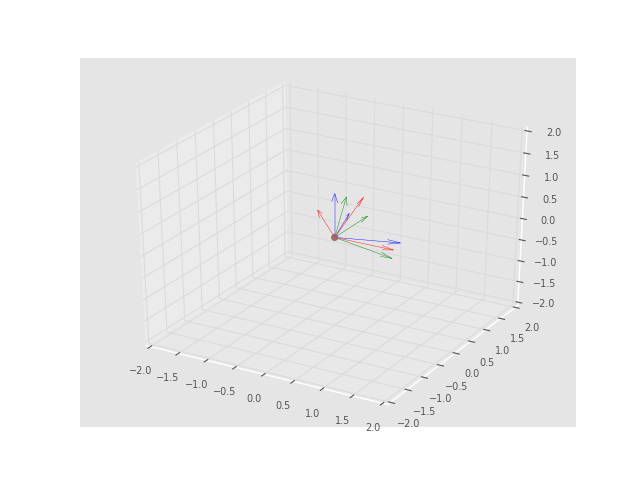

In [18]:
# Prepare to plot
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
fig = plt.figure()
ax = fig.gca(projection='3d')

In [19]:
# Depict a rotation matrix as a rotated coordinate frame using the tollbox function trplot()
trplot( rx,dims=[-2,2],color='red',width=0.3)

In [20]:
# Depict a rotation matrix as a rotated coordinate frame using the tollbox function trplot()
trplot( ry,color='green',width=0.3)

In [21]:
trplot( rz,color='blue',width=0.3)

---

# Representing Position in 3D

In robotics we frequently need to describe the position of objects such as robots, cameras and workpieces. 

We represent position with an SE3 object,   For example to create a translation of 1 unit in the x-direction is simply

In [23]:
T1 = SE3.Tx(1)

More correctly this is a _motion_ in 3D space which we can visualize as the blue coordinate frame

<IPython.core.display.Javascript object>


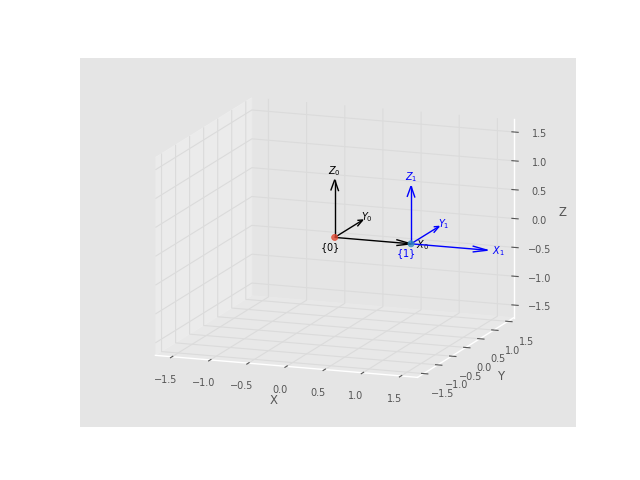

In [24]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black')
T1.plot(frame='1')

Click on the coordinate frame and use the mouse to change the viewpoint and verify that this is indeed a motion of 1 unit in the X-direction.

To consider this as a motion, as opposed to a position, think about picking up the world coordinate frame (black) which sits at the origin of this coordinate system, and carry it 1 unit in the x-direction.

Importantly we can _compose_ motions, that is perform the motions in sequence, and we denote this in python using the multiplication operator `*`. For example

In [25]:
T2 = T1 * T1

The choice of operator is arbitrary but it is a fairly common convention.  If python allowed a special operator like $\oplus$, such as used in the _Robotics, Vision & Control_ book, we could use that.  

The resulting motion, the _composition_ , is shown in blue.  It is 1 unit in the X-direction and then 1 unit in the X-direction, for a total of 2 units in the X-direction.

<IPython.core.display.Javascript object>


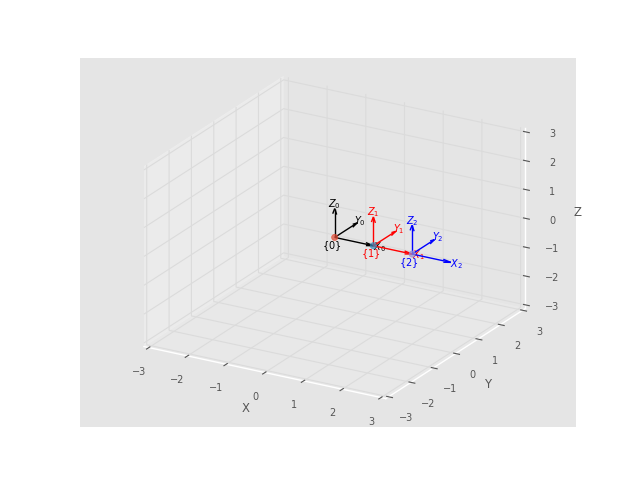

In [26]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black')
T1.plot(frame='1', color='red')
T2.plot(frame='2')

We could also have written

In [27]:
T2 = T1**2

T2 = T1
T2 *= T1

Let's look at what's inside the SE3 object

In [28]:
T2

SE3:   1           0           0           2            
       0           1           0           0            
       0           0           1           0            
       0           0           0           1            
    

and perhaps surprisingly we see that it's a 4x4 matrix.  We could create a motion of 4 units in the Z-direction

In [29]:
SE3.Tz(4)

SE3:   1           0           0           0            
       0           1           0           0            
       0           0           1           4            
       0           0           0           1            
    

and we observe some clear pattern and structure which is accentuated here by the colors.  We see that the numbers concerned with the distance moved are in blue on the right hand side.  

These matrices have a very particular structure.  We see a 3x3 identity matrix in red, and the bottom row in grey always has the same values. 

A mathematician would say these matrices are a subset of all possible real 4x4 matrices which belong to the Special Euclidean _group_ in 3 dimensions which is generally shortened to $\mbox{SE}(3)$ – hence the name of our Python class.  These matrices represent motions – often referred to as _rigid body motions_ in 3D space.  These matrices are also known as _homogeneous transformation_ matrices – a 4x4 matrix. One characteristic of these matrices is that multiplying them together causes the motions to be added.

This certainly seems like overkill for this problem – there are 16 numbers in each of these matrices and we know that only 3 are required to describe a position in 3D space.  It is also quite unintuitive since we multiplied matrices (complex) when we could have just _added_ these displacements using vectors.  Happily this has real advantages when we consider rotations in the next section so suspend your scepticism for now.

We finish off this section on position by noting that, following the earlier pattern, you can create a motion in the Z-direction by

In [30]:
SE3.Tz(3)

SE3:   1           0           0           0            
       0           1           0           0            
       0           0           1           3            
       0           0           0           1            
    

or we can specify motion in the X-, Y- and Z-directions in one hit. For example

In [31]:
SE3(7, 8, 9)

SE3:   1           0           0           7            
       0           1           0           8            
       0           0           1           9            
       0           0           0           1            
    

which is exactly the same as

In [32]:
SE3.Tx(7) * SE3.Ty(8) * SE3.Tz(9)

SE3:   1           0           0           7            
       0           1           0           8            
       0           0           1           9            
       0           0           0           1            
    

Those following closely might have noticed `SE3()` with no arguments which was used to position the black (world coordinate) frame.  This is simply the null motion.

Every motion has an "opposite motion" which is given by the inverse method

In [33]:
SE3.Ty(2).inv()

SE3:   1           0           0           0            
       0           1           0          -2            
       0           0           1           0            
       0           0           0           1            
    

So doing a motion, then the inverse motion 

In [34]:
SE3.Ty(2) * SE3.Ty(2).inv()

SE3:   1           0           0           0            
       0           1           0           0            
       0           0           1           0            
       0           0           0           1            
    

is a **null motion**.  Two steps forward, then two steps back.

### Point Transformations

Earlier we visualized an `SE3` object as a coordinate frame, not as a point.  Coordinate frames are extremely useful when thinking about problems in robotics – we typically attach them to a **robot's end-effector, a camera or a drone**.  They indicate not just where something is, but how it is oriented. The extra information that allows us to visualize an `SE3` object as a frame, not as a point, comes from all that extra information encoded in the SE(3) matrix.

Consider that the frame is attached to a robot, and there is a point on the robot that is at a coordinate (1,2,3) with respect to that frame.  As the frame moves, that point moves with it and changes with respect to the world coordinate frame.  Let's define the point as:

In [35]:
P = [1,2,3]

which we have done with a Python list but we could also use a tuple or a numpy array. If the robot is at position of (4,5,6) then the point is _transformed_ to

In [36]:
SE3(4,5,6) * P

array([       5,        7,        9])

which is as expected.

Again, this is almost trivial, but is far from trivial when we talk about the coordinate frames that are rotated with respect to the world coordinate frame.

### Rotations and Translations can be easily combined:

We have discussed how `SE3` objects can represent position and how `SO3` objects can represent rotation.  You might recall that the SE3 matrix had a 3x3 component (colored red) to it and as you can probably guess that is actually an SO(3) matrix as we've just discussed. The SE(3) group is a superset if you like, of the SO(3) group.  The latter can represent orientation, whereas the SE(3) is also able to represent position. The combination of position and orientation is known as _pose_.

In [37]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')

Is a composition of two motions: a translation and _then_ a rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example Out[20] was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

<IPython.core.display.Javascript object>


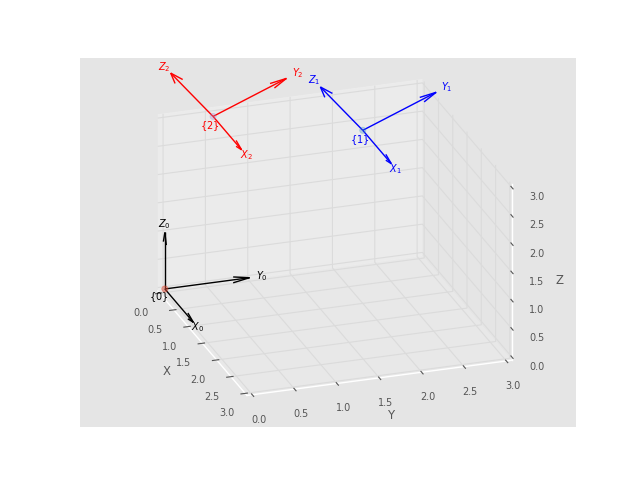

In [38]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[0,3], color='black')
T1.plot(frame='1')

The order of rotation is really important. If we reverse the two motions

In [39]:
T2 = SE3.Rx(30, 'deg') * SE3(1, 2, 3)

we see the result is different.  In this case we turned first, then moved so we followed a different path

In [40]:
T2.plot(frame='2', color='red')

Consider again a point which is attached to, or defined relative to the coordinate frame {1}.

In [ ]:
P = [1, 2, 1]

In the world coordinate frame its coordinate is

In [ ]:
T1 * P

where the position vector representing the point, has been premultiplied by the homogeneous transformation `T`. The point has been rotated and translated.

The vector is given here as a list but could also be a numpy array.  If the frame is denoted by {A} then our rotation matrix is ${}^0 \mathbf{T}_A$ so a point ${}^A P$ defined with respect to frame {A} is transformed as ${}^0 P = {}^0 \mathbf{T}_A\,{}^A P$.  


Now lets imagine the point P is defined with respect to the world coordinate frame.  To find its position with respect to frame {1} is simply

In [ ]:
T1.inv() * P

where the inverse (computed in an efficient manner based on the structure of the matrix)

An SE3 instance has a number of properties, many of which are _inherited_ from the SO3 class.  For example the columns of the rotation are often written as $[n, o, a]$

In [ ]:
T1.n, T1.o, T1.a

We can extract the rotation matrix as a numpy array

In [ ]:
T1.R

or the translation vector, as a numpy array

In [ ]:
T1.t

which has 3 elements because it is a translation in 3D space.

### Transforming points

Imagine now a set of points defining the vertices of a cube

In [ ]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

defined with respect to a rotationg reference frame ${}^A P_i$.  Given a rotation ${}^0 \mathbf{T}_A$ as above, we determine the coordinates of the points in the world frame by ${}^0 P_i = ({}^0 \mathbf{T}_A)^{-1} {}^0 P_i$ which we can do in a single operation

In [ ]:
T1 = SE3.Rx(90, 'deg')
Q = T1 * P
print(Q)

which we could then plot.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Notice, there are a total of 8 vertices
# Each column is 1 vertex
# Below, we will pass them as rows: row1==x, row2==y, row3==z
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=50)  # draw vertices

In [ ]:
# draw lines joining the vertices
# Each number below represents one of the 8 coordinate points defined above
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]] 

# Set limits and labels to the figure
ax.set_xlim3d(-1,1); ax.set_ylim3d(-1,1); ax.set_zlim3d(-1,1);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

# Connect and print points to lines for x, y, z coordinates
from IPython import display
import time

for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line]) 
    fig.canvas.draw() # update figure
    time.sleep(1)     # wait a sec
        

## Multi-valued objects

For many tasks we might want to have a set or sequence of rotations or poses. The obvious solution would be to use a Python list

In [ ]:
T = [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)]

but the pose objects in this package can hold multiple values, just like a native Python list can.  There are a few ways to do this, most obviously

In [ ]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )

which has the type of a pose object

In [ ]:
type(T)

but it has length of five

In [ ]:
len(T)

that is, it contains five values.  We can see these when we display the object's value

In [ ]:
T

We can index into the object (slice it) just as we would a Python list

In [ ]:
T[3]

or from the second element to the last in steps of two

In [ ]:
T[1:-1:2]

We could another value to the end

In [ ]:
T.append( SE3.Rx(0.5) )
len(T)

and we we see that the length has increased.  The value just appended would be `T[5]`

The `SE3` class, like all the classes in the spatialmath package, inherits from the `UserList` class giving it all the methods of a Python list like `append`, `extend`, `insert`, `pop`, `del`, `clear`, `reverse`.

We could write the above example more succinctly as

In [ ]:
T = SE3.Rx( np.linspace(0, 0.5, 5) )
len(T)

Consider another rotation

In [ ]:
T2 = SE3.Ry(40, 'deg')

then we can write

In [ ]:
A = T * T2
len(A)

which has produced a new list where each element of `A` is the `T[i] * T2`.  Similarly

In [ ]:
B = T2 * T
len(B)

which has produced a new list where each element of `B` is the `T2 * T[i]`.

And perhaps not surprisingly 

In [ ]:
C = T * T
len(C)

which has produced a new list where each element of `C` is the product `T[i] * T[i]`.

We can apply such a sequence to a coordinate vectors as we did earlier

In [ ]:
P = T * [0, 1, 0]
P

where each element of `T` has transformed the 3D coordinate vector $(0, 1, 0)$, the results being consecutive columns of the resulting numpy array.  Note that:
 * the vector  has been implicitly considered as a column vector, 
 * the vector can be given as a list (as in this case) or as a NumPy array

Imagine now that we wanted to display the cube we showed earlier, for each value in the pose object, we simply use a `for` loop

In [ ]:
for x in T:
    Q = x * P
    # plot(Q)

and we can also use these pose objects inside list comprehensions

In [ ]:
np.array([ x * [0,1,0] for x in T])

## Lec 3.7 Rotations are Non-Commutative

In [ ]:
# A rotation of 90 degrees about x-axis followed by a rotation of 90 degrees about the y-axis, gives a resulting rotation matrix:
fig=plt.figure()
SE3().plot(dims=[-1,1],color='black')
Rx=SO3.Rx(1.57)
Ry=SO3.Ry(1.57)
R1=Rx*Ry
print(R1)

In [ ]:
# Now print the opposite order rotation. 
R2=Ry*Rx
R2.plot(color='red',frame='R2')

Other operations that the SE3 class supports are:

| Constructor   |  motion |
|---------------|-----------|
| SE3()      | null motion |
| SE3.Tx(d)  |  translation along X-axis |
| SE3.Ty(d)  |  translation along Y-axis |
| SE3.Tz(d)  |  translation along Z-axis |
| SE3.Rx(theta)  |  rotation about X-axis |
| SE3.Ry(theta)  |  rotation about Y-axis|
| SE3.Rz(theta)  |  rotation about Z-axis|
| SE3.RPY(rpy)  |  rotation from roll-pitch-yaw angle vector|
| SE3.Eul(euler)  | rotation from Euler angle vector |
| SE3.AngVec(theta, v)  | rotation from rotation and axis |
| SO3.Omega(v)  | from a twist vector |
| SE3.OA(ovec, avec)  | rotation from orientation and approach vectors |

---

## Lec 3.8 Angle Sequences

### Euler Angles
The toolbox function eul2r() accepts the 3 Euler angles (using the ZYZ sequence) and returns the
corresponding rotation matrix. In this case we will pass the Euler angles of 0.1, 0.2 and 0.3 radians:

In [ ]:
R1=eul2r(0.1,0.2,0.3)
# R1=eul2tr(0.1,0.2,0.3) # or a homogeneous transform

We can perform the inverse by using the toolbox function tr2eul(), converting the resulting
rotation matrix to Euler angles:

In [ ]:
tr2eul(R1)

A slightly different case, with the second angle being negative gives:

In [ ]:
R2=eul2r(0.1,-0.2,0.3)
print(R2)

Returning the resulting rotation matrix back to Euler angles gives:

In [ ]:
R3=tr2eul(R2)

Showing that the Euler angles returned are not those that we started with. There are two sets of Euler
angles which can represent the same rotation matrix. Converting these Euler angles back to the rotation
matrix again, shows this to be the case.

In [ ]:
eul2r(R3)

---

## Roll-Pitch-Yaw Angles

The toolbox function rpy2r() accepts the 3 roll-pitch-yaw angles and returns the corresponding
rotation matrix. In this case we will pass the roll-pitch-yaw angles of 0.1, 0.2 and 0.3 radians:

In [ ]:
R1=rpy2r(0.1,0.2,0.3)
print(R1)

We can perform the inverse by using the toolbox function tr2rpy(), converting the resulting
rotation matrix to roll-pitch-yaw angles:

In [ ]:
tr2rpy(R1)
print(R1)

You can use the S03 class. Which is very handy.


A number of other constructors provide convenient ways to describe a rotation

| Constructor   |  rotation |
|---------------|-----------|
| SO3.Rx(theta)  |  about X-axis |
| SO3.Ry(theta)  |  about Y-axis|
| SO3.Rz(theta)  |  about Z-axis|
| SO3.RPY(rpy)  |  from roll-pitch-yaw angle vector|
| SO3.Eul(euler)  | from Euler angle vector |
| SO3.AngVec(theta, v)  | from rotation and axis |
| SO3.Exp(v)  | from a twist vector |
| SO3.OA  | from orientation and approach vectors |

In [ ]:
R1 = SO3.Rx(45, 'deg')
print(R1)

And turn back:

In [ ]:
R1.rpy(unit='deg')

The matrices that represent rotations have a very particular structure but it is perhaps not immediately obvious.  Each column (and row) is a unit vector, and each column (and row) is orthogonal  to all the others – that is the inner product is zero.

A mathematician would say the matrices are a subset of all possible 3x3 matrices which belong to the Special Orthogonal _group_ in 3 dimensions which is generally shortened to $\mbox{SO}(3)$ – hence the name of our Python class.  These matrices represent rotations in 3D space.  These matrices are also known as _rotation_ matrices.

A very useful property of matrices in $\mbox{SO}(N)$ is that the inverse is equal to its transpose, and its determinant is always +1.

In [ ]:
SO3.Rz(pi/4) * SO3.Rz(pi/4).inv()


---

### Gymbal Lock Example

In [44]:
from math import pi

R=rpy2r(0.3, pi/2, 0.5)
print(R)

[[       0  -0.1987   0.9801]
 [       0   0.9801   0.1987]
 [      -1        0        0]]


In [45]:
tr2rpy(R)

array([       0,    1.571,      0.2])

What can you notice about the rpy angles? Are they the same?

When the pitch is 90 degrees, do you notice a relationship between the other two numbers?

This is a singularity and it occurs in any *3-angle sequence representation of an orientation* (RPY, eul).

Also known as **gymbal lock**

Try it in the tripleangle demo.

---

## Lec 3.11 Angle-axis

Create a rotation matrix that rotates around x by 0.3 radians

In [47]:
angvec2r(0.3, [1, 0, 0])  # rotx(0.3)

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

Similarly, create a rotation matrix using the toolbox function eul2r() and Euler angles of 0.1, 0.2 and 0.3
radians:

In [54]:
R = eul2r(0.1,0.2,0.3)
print(R)

[[  0.9021  -0.3836   0.1977]
 [  0.3875   0.9216  0.01983]
 [ -0.1898  0.05871   0.9801]]


Plot the rotated coordinate frame corresponding to this rotation matrix using the toolbox function trplot:

<IPython.core.display.Javascript object>


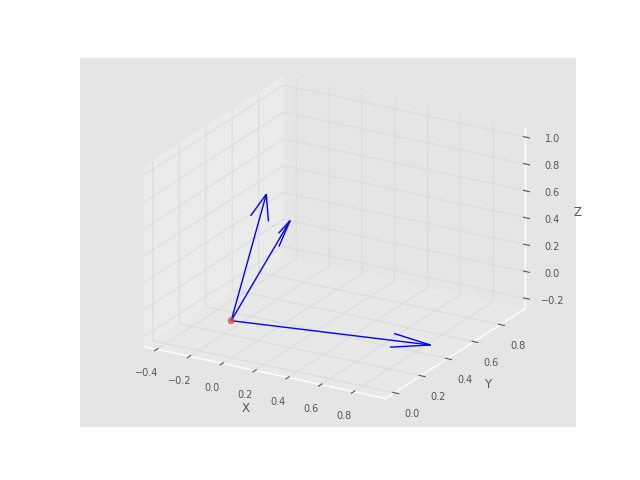

In [55]:
fig=plt.figure()
trplot(R)

Find the eigenvalues of the rotation matrix using the eig() function:

In [61]:
eVal,eVec=np.linalg.eig(R)
print('We get 3 eignevalues. Look for the real one: \n', 
     eVal[0], '\n', 
     eVal[1], '\n', 
     eVal[2], '\n', )

We get 3 eignevalues. Look for the real one: 
 (0.9019143341097934+0.4319149614533955j) 
 (0.9019143341097934-0.4319149614533955j) 
 (1+0j) 



The real eigenvalue is the 3rd one. Use the eignevectors associated with eigevalue [2] (the third col) to extract our axis of rotation

In [62]:
print(eVec)

[[ 0.70639+0.j       0.70639-0.j       0.04501+0.j     ]
 [-0.01429-0.63182j -0.01429+0.63182j  0.44855+0.j     ]
 [-0.02844+0.3175j  -0.02844-0.3175j   0.89262+0.j     ]]


In [63]:
axx=np.vstack(eVec[:,2]) # vstack helps us to display vertically. easier to see.
np.set_printoptions(precision=5)
print(axx)

[[0.04501+0.j]
 [0.44855+0.j]
 [0.89262+0.j]]


We can do the equivalent calculation, by using the toolbox function tr2angvec() which contains the appropriate computation:

In [59]:
a,v=tr2angvec(R)
print('Rotation angale is: ', a)
print('Rotation axis is:  ', v)

Rotation angale is:  0.44661491898002814
Rotation axis is:   [0.04501 0.44855 0.89262]


---

## Lec 3.12 Quaternions
https://petercorke.github.io/spatialmath-python/func_quat.html

## Quaternions

A quaternion is often described as a type of complex number but it is more useful (and simpler) to think of it as an order pair comprising a scalar and a vector.  We can create a quaternions

In [ ]:
q1 = Quaternion([1,2,3,4])
q1

where the scalar is before the angle brackets which enclose the vector part.  

Properties allow us to extract the scalar part

In [ ]:
q1.s

and the vector part

In [ ]:
q1.v

and we can represent it as a numpy array

In [ ]:
q1.vec

A quaternion has a conjugate

In [ ]:
q1.conj()

and a norm, which is the magnitude of the equivalent 4-vector 

In [ ]:
q1.norm()

We can create a second quaternion

In [ ]:
q2 = Quaternion([5,6,7,8])
q2

Operators allow us to add

In [ ]:
q1 + q2

subtract

In [ ]:
q1 - q2

and to multiply

In [ ]:
q1 * q2

which follows the special rules of Hamilton multiplication.

Multiplication can also be performed as the linear algebraic product of one quaternion converted to a 4x4 matrix  

In [ ]:
q1.matrix

and the other as a 4-vector 

In [ ]:
q1.matrix @ q2.vec

The product of a quaternion and its conjugate is a scalar equal to the square of its norm

In [ ]:
q1 * q1.conj()

Conversely, a quaternion with a zero scalar part is called a _pure quaternion_

In [ ]:
Quaternion.Pure([1, 2, 3])

### Unit quaternions

A quaternion with a unit norm is called a _unit quaternion_ .  It is a group and its elements represent rotation in 3D space.  It is in all regards like an $\mbox{SO}(3)$ matrix except for a _double mapping_ -- a quaternion and its element-wise negation represent the same rotation.

In [ ]:
q1 = UnitQuaternion.Rx(30, 'deg')
q1

the convention is that unit quaternions are denoted using double angle brackets.  The norm, as advertised is indeed one

In [ ]:
q1.norm()

We create another unit quaternion

In [ ]:
q2 = UnitQuaternion.Ry(-40, 'deg')
q2

The rotations can be composed by quaternion multiplication

In [ ]:
q3 = q1 * q2
q3

We can convert a quaternion to a rotation matrix

In [ ]:
q3.R

which yields exactly the same answer as if we'd done it using SO(3) rotation matrices

In [ ]:
SO3.Rx(30, 'deg') * SO3.Ry(-40, 'deg')

The advantages of unit quaternions are that

1. they are compact, just 4 numbers instead of 9
2. multiplication involves fewer operations and is therefore faster
3. numerical errors build up when we multiply rotation matrices together many times, and they lose the structure (the columns are no longer unit length or orthogonal).  Correcting this, the process of _normalization_ is expensive.  For unit quaternions errors will also compound, but normalization is simply a matter of dividing through by the norm

Unit quaternions have an inverse

In [ ]:
q2.inv()

In [ ]:
q1 * q2.inv()

or

In [ ]:
q1 / q2

We can convert any unit quaternion to an SO3 object if we wish

In [ ]:
q1.SO3()

and conversely, any `SO3` object to a unit quaternion

In [ ]:
UnitQuaternion( SO3.Rx(30, 'deg'))

A unit quaternion is not a minimal representation. Since we know the magnitude is 1, then with any 3 elements we can compute the fourth upto a sign ambiguity. 

In [ ]:
q1.vec3

In [ ]:
a = UnitQuaternion.qvmul( q1.vec3, q2.vec3)
a

from which we can recreate the unit quaternion

In [ ]:
UnitQuaternion.Vec3(a)